###OLHEI O QUE FOI PEDIDO NO DESAFIO, E O NOSSO "AMIGO" RECOMENDOU SEPARAR O DESAFIO EM PARTES###

#Entendimento dos dados#
Analisaremos quaiis tabelas e colunas que poderão ser úteis no desafio



In [22]:
#DOWNLOADO DE DADOS PARA O COLAB E LEITURA DOS ARQUIVOS#

import pandas as pd
import glob
import os

# Definir os diretórios onde estão os arquivos
pastas = ['/content/icu', '/content/hosp']

# Criar um dicionário para armazenar os DataFrames
dados = {}

# Percorrer cada pasta e ler os arquivos
for pasta in pastas:
    arquivos_gz = glob.glob(os.path.join(pasta, "*.csv.gz"))  # Encontra todos os arquivos .csv.gz

    for arquivo in arquivos_gz:
        nome_tabela = os.path.basename(arquivo).replace('.csv.gz', '')  # Nome do arquivo sem extensão

        try:
            # Lendo o arquivo CSV compactado
            df = pd.read_csv(arquivo, compression='gzip')
            dados[nome_tabela] = df  # Armazena o DataFrame no dicionário

            print(f"Lido: {nome_tabela} ({df.shape[0]} linhas, {df.shape[1]} colunas)")

        except Exception as e:
            print(f"Erro ao ler {arquivo}: {e}")

# Verificar quais tabelas foram carregadas
print("\nTabelas carregadas:", list(dados.keys()))


Lido: outputevents (9362 linhas, 9 colunas)
Lido: chartevents (668862 linhas, 11 colunas)
Lido: ingredientevents (25728 linhas, 17 colunas)
Lido: caregiver (15468 linhas, 1 colunas)
Lido: procedureevents (1468 linhas, 22 colunas)
Lido: inputevents (20404 linhas, 26 colunas)
Lido: icustays (140 linhas, 8 colunas)
Lido: datetimeevents (15280 linhas, 10 colunas)
Lido: d_items (4014 linhas, 9 colunas)


<ipython-input-22-759e6f4e5e7f>:22: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, compression='gzip')


Lido: emar_detail (72018 linhas, 33 colunas)
Lido: microbiologyevents (2899 linhas, 25 colunas)
Lido: diagnoses_icd (4506 linhas, 5 colunas)
Lido: emar (35835 linhas, 12 colunas)
Lido: d_icd_procedures (85257 linhas, 3 colunas)
Lido: d_hcpcs (89200 linhas, 4 colunas)
Lido: procedures_icd (722 linhas, 6 colunas)
Lido: labevents (107727 linhas, 16 colunas)
Lido: d_labitems (1622 linhas, 4 colunas)
Lido: provider (40508 linhas, 1 colunas)
Lido: omr (2964 linhas, 5 colunas)
Lido: transfers (1190 linhas, 7 colunas)
Lido: poe_detail (3795 linhas, 5 colunas)
Lido: d_icd_diagnoses (109775 linhas, 3 colunas)
Lido: pharmacy (15306 linhas, 27 colunas)
Lido: prescriptions (18087 linhas, 21 colunas)
Lido: services (319 linhas, 5 colunas)
Lido: drgcodes (454 linhas, 7 colunas)
Lido: patients (100 linhas, 6 colunas)
Lido: admissions (275 linhas, 16 colunas)
Lido: hcpcsevents (61 linhas, 6 colunas)
Lido: poe (45154 linhas, 12 colunas)

Tabelas carregadas: ['outputevents', 'chartevents', 'ingredienteve

In [23]:
print(list(dados.keys()))  # Ver quais tabelas foram carregadas


['outputevents', 'chartevents', 'ingredientevents', 'caregiver', 'procedureevents', 'inputevents', 'icustays', 'datetimeevents', 'd_items', 'emar_detail', 'microbiologyevents', 'diagnoses_icd', 'emar', 'd_icd_procedures', 'd_hcpcs', 'procedures_icd', 'labevents', 'd_labitems', 'provider', 'omr', 'transfers', 'poe_detail', 'd_icd_diagnoses', 'pharmacy', 'prescriptions', 'services', 'drgcodes', 'patients', 'admissions', 'hcpcsevents', 'poe']


Tabelas carregadas: ['outputevents', 'chartevents', 'ingredientevents', 'caregiver', 'procedureevents', 'inputevents', 'icustays', 'datetimeevents', 'd_items', 'emar_detail', 'microbiologyevents', 'diagnoses_icd', 'emar', 'd_icd_procedures', 'd_hcpcs', 'procedures_icd', 'labevents', 'd_labitems', 'provider', 'omr', 'transfers', 'poe_detail', 'd_icd_diagnoses', 'pharmacy', 'prescriptions', 'services', 'drgcodes', 'patients', 'admissions', 'hcpcsevents', 'poe']
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10014729      F          21         2125       2011 - 2013         NaN
1    10003400      F          72         2134       2011 - 2013  2137-09-02
2    10002428      F          80         2155       2011 - 2013         NaN
3    10032725      F          38         2143       2011 - 2013  2143-03-30
4    10027445      F          48         2142       2011 - 2013  2146-02-09


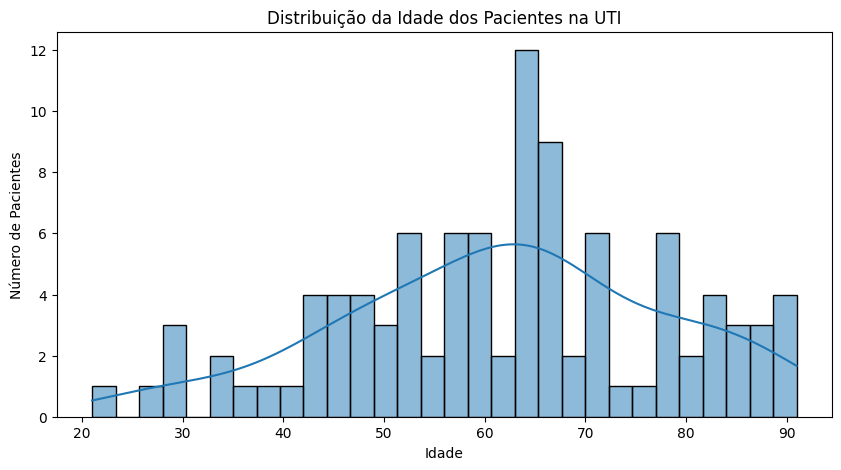

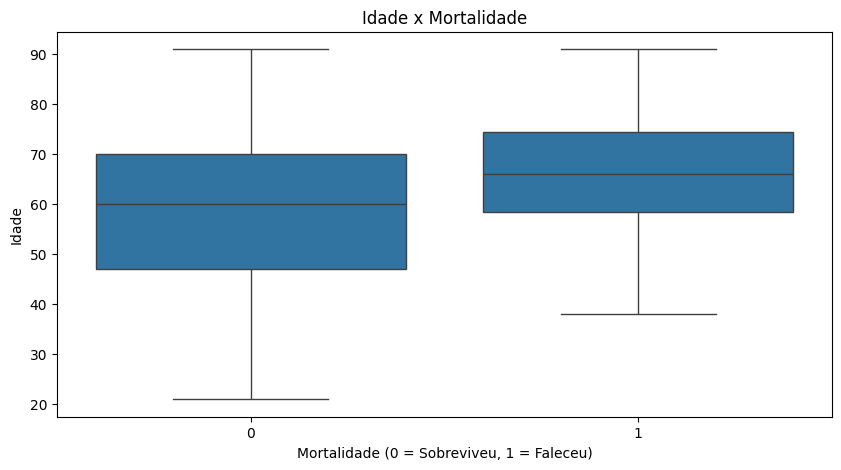

        count       mean        std   min   25%   50%   75%   max
morreu                                                           
0        69.0  59.492754  16.727595  21.0  47.0  60.0  70.0  91.0
1        31.0  66.774194  13.812337  38.0  58.5  66.0  74.5  91.0


In [24]:
#ANÁLISE DE EXEMPLO#

import matplotlib.pyplot as plt
import seaborn as sns

# Verificar quais tabelas temos
print("Tabelas carregadas:", list(dados.keys()))

# Olhar algumas linhas da tabela 'patients' (que contém informações dos pacientes)
if 'patients' in dados:
    df_pacientes = dados['patients']
    print(df_pacientes.head())
else:
    print("Tabela 'patients' não encontrada. Veja quais tabelas existem e escolha outra.")

# Vamos assumir que a idade dos pacientes está na coluna 'anchor_age' (verifique se esse é o nome correto)
if 'anchor_age' in df_pacientes.columns:

    # Plotar a distribuição da idade dos pacientes na UTI
    plt.figure(figsize=(10, 5))
    sns.histplot(df_pacientes['anchor_age'], bins=30, kde=True)
    plt.xlabel('Idade')
    plt.ylabel('Número de Pacientes')
    plt.title('Distribuição da Idade dos Pacientes na UTI')
    plt.show()

    # Analisar a relação entre idade e mortalidade
    if 'dod' in df_pacientes.columns:  # 'dod' é a data de óbito, se existir
        df_pacientes['morreu'] = df_pacientes['dod'].notna().astype(int)  # 1 = morreu, 0 = sobreviveu

        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df_pacientes['morreu'], y=df_pacientes['anchor_age'])
        plt.xlabel('Mortalidade (0 = Sobreviveu, 1 = Faleceu)')
        plt.ylabel('Idade')
        plt.title('Idade x Mortalidade')
        plt.show()

        print(df_pacientes.groupby('morreu')['anchor_age'].describe())

    else:
        print("A coluna 'dod' (data de óbito) não foi encontrada. Verifique outra forma de identificar mortalidade.")
else:
    print("A coluna 'anchor_age' não foi encontrada. Verifique o nome correto da coluna de idade.")


#ANÁLISE EXPLORATÓRIA#
Analisaremos os dados de forma estatística, observando a relação entre fatores de risco e mortalidade

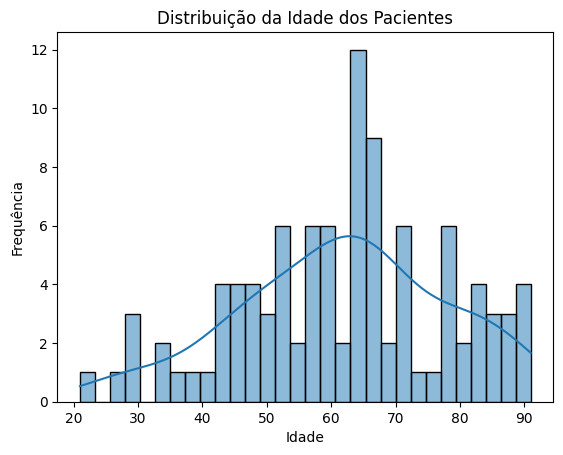

In [25]:
#Distribuição de idade dos pacientes#

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_pacientes['anchor_age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


In [26]:
#Exemplo da relação entre sexo e mortalidade#

#ANÁLISES ESPECÍFICAS#
Explorar a relação entre vasopressores, ventilação mecânica e substituição renal com a mortalidade

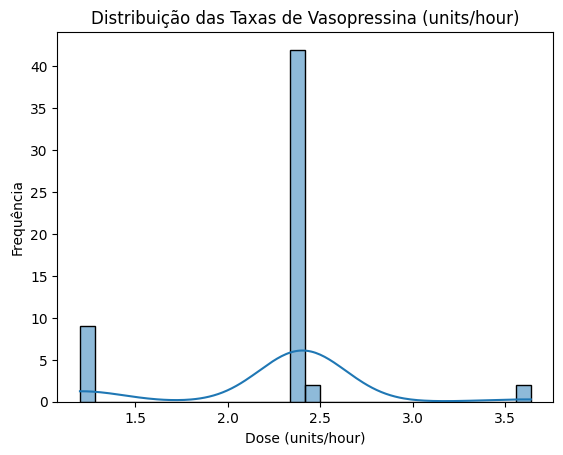

In [27]:
import pandas as pd

# Carregar a tabela 'inputevents' do dicionário de dados
df_inputevents = dados['inputevents']  # Substitua pelo nome correto, se necessário

# Filtrar apenas as linhas onde itemid = 222315 (Vasopressina)
df_vasopressina = df_inputevents[df_inputevents['itemid'] == 222315].copy()

# Criar a coluna vaso_rate convertendo unidades de 'units/min' para 'units/hour'
df_vasopressina['vaso_rate'] = df_vasopressina.apply(
    lambda row: row['rate'] * 60 if row['rateuom'] == 'units/min' else row['rate'],
    axis=1
)

# Selecionar apenas as colunas desejadas
df_vasopressina = df_vasopressina[['stay_id', 'linkorderid', 'vaso_rate', 'amount', 'starttime', 'endtime']]

# Exibir as primeiras linhas do DataFrame filtrado
df_vasopressina.head()

df_vasopressina.describe()

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_vasopressina['vaso_rate'], bins=30, kde=True)
plt.title("Distribuição das Taxas de Vasopressina (units/hour)")
plt.xlabel("Dose (units/hour)")
plt.ylabel("Frequência")
plt.show()


Index(['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'poe_seq',
       'order_provider_id', 'starttime', 'stoptime', 'drug_type', 'drug',
       'formulary_drug_cd', 'gsn', 'ndc', 'prod_strength', 'form_rx',
       'dose_val_rx', 'dose_unit_rx', 'form_val_disp', 'form_unit_disp',
       'doses_per_24_hrs', 'route'],
      dtype='object')
Pacientes que receberam vasopressores: 64
Taxa de mortalidade para pacientes que receberam vasopressores: 18.75%
Taxa de mortalidade para pacientes sem vasopressores: 1.42%


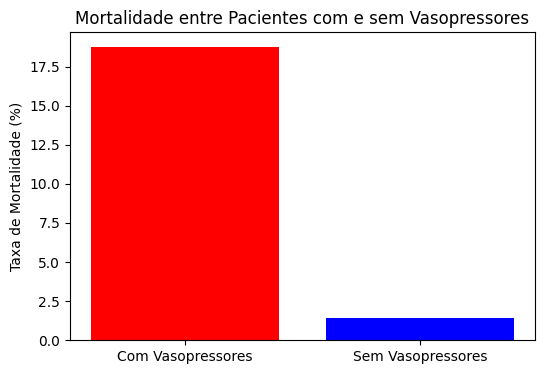

In [28]:
# PACIENTES QUE USARAM VASOPRESSORES ------------------------------------------------------->
# Verificar as colunas disponíveis na tabela prescriptions
print(dados['prescriptions'].columns)

# Filtrar vasopressores na tabela prescriptions
vasopressores = dados['prescriptions'][dados['prescriptions']['drug'].str.contains("norepinephrine|epinephrine|vasopressin|dopamine|phenylephrine", case=False, na=False)]

# Selecionar apenas IDs únicos de pacientes que receberam vasopressores
vasopressores_patients = vasopressores[['subject_id', 'hadm_id']].drop_duplicates()

print(f"Pacientes que receberam vasopressores: {vasopressores_patients.shape[0]}")

# ASSOCIAÇÃO COM MORTALIDADE ------------------------------------------------------->

# Mesclar pacientes que usaram vasopressores com a tabela de admissões
df_merged = vasopressores_patients.merge(dados['admissions'][['subject_id', 'hadm_id', 'hospital_expire_flag']], on=['subject_id', 'hadm_id'], how='left')

# Calcular a taxa de mortalidade entre pacientes que usaram vasopressores
mortality_rate = df_merged['hospital_expire_flag'].mean() * 100
print(f"Taxa de mortalidade para pacientes que receberam vasopressores: {mortality_rate:.2f}%")

# COMPARAÇÃO COM OS QUE NÃO USARAM ------------------------------------------------------->

# Pacientes que NÃO usaram vasopressores
no_vaso_patients = dados['admissions'][~dados['admissions']['hadm_id'].isin(vasopressores_patients['hadm_id'])]

# Calcular a taxa de mortalidade para pacientes sem vasopressores
no_vaso_mortality_rate = no_vaso_patients['hospital_expire_flag'].mean() * 100
print(f"Taxa de mortalidade para pacientes sem vasopressores: {no_vaso_mortality_rate:.2f}%")


# GRÁFICO COMPARATIVO ------------------------------------------------------->

import matplotlib.pyplot as plt

# Criar um gráfico de barras
labels = ['Com Vasopressores', 'Sem Vasopressores']
rates = [mortality_rate, no_vaso_mortality_rate]

plt.figure(figsize=(6,4))
plt.bar(labels, rates, color=['red', 'blue'])
plt.ylabel("Taxa de Mortalidade (%)")
plt.title("Mortalidade entre Pacientes com e sem Vasopressores")
plt.show()



In [29]:
# AJUSTE POR IDADES

# Unir informações de idade e comorbidades com os pacientes que usaram vasopressores
pacientes = dados['patients'][['subject_id', 'anchor_age']]  # Pegando a idade

# Filtrar apenas diagnósticos relevantes (ex: hipertensão, diabetes)
comorbidades = dados['diagnoses_icd'][['subject_id', 'icd_code']]
doencas_relevantes = ['4019', '25000']  # Hipertensão essencial, Diabetes mellitus tipo 2
comorbidades['tem_comorbidade'] = comorbidades['icd_code'].isin(doencas_relevantes).astype(int)
comorbidades = comorbidades.groupby('subject_id')['tem_comorbidade'].max().reset_index()

# Pegar a mortalidade e o uso de vasopressores
prescriptions = dados['prescriptions'][['subject_id', 'drug']]  # Pegando a prescrição de drogas
vasopressores = ['norepinephrine', 'epinephrine', 'dopamine', 'vasopressin']  # Principais vasopressores
prescriptions['usou_vasopressor'] = prescriptions['drug'].isin(vasopressores).astype(int)
prescriptions = prescriptions.groupby('subject_id')['usou_vasopressor'].max().reset_index()

# Pegar a mortalidade (da tabela admissions)
mortalidade = dados['admissions'][['subject_id', 'hospital_expire_flag']]

# Juntar todas as tabelas
df = pacientes.merge(comorbidades, on='subject_id', how='left')
df = df.merge(prescriptions, on='subject_id', how='left')
df = df.merge(mortalidade, on='subject_id', how='left')

# Substituir NaN por 0 em colunas booleanas
df.fillna({'tem_comorbidade': 0, 'usou_vasopressor': 0}, inplace=True)

# Mostrar os primeiros resultados
df.head()


<ipython-input-29-d9f0d57a7b30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comorbidades['tem_comorbidade'] = comorbidades['icd_code'].isin(doencas_relevantes).astype(int)
<ipython-input-29-d9f0d57a7b30>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescriptions['usou_vasopressor'] = prescriptions['drug'].isin(vasopressores).astype(int)


,subject_id,anchor_age,tem_comorbidade,usou_vasopressor,hospital_expire_flag
0,10014729,21,0,0,0
1,10014729,21,0,0,0
2,10003400,72,1,0,1
3,10003400,72,1,0,0
4,10003400,72,1,0,0


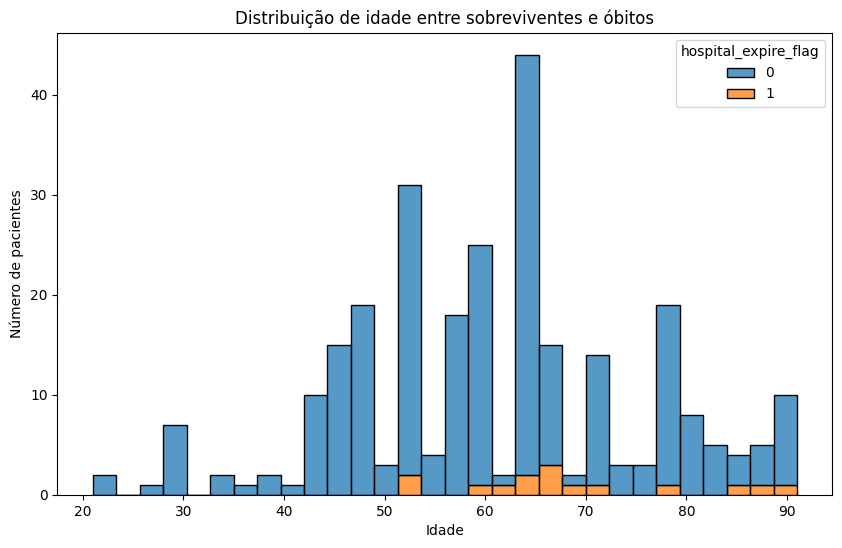

In [30]:
# USO DE VASOPRESSORES AJUSTADO POR IDADES E COMORBIDADES


import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico de mortalidade por idade e uso de vasopressores
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='anchor_age', hue='hospital_expire_flag', bins=30, multiple='stack')
plt.title("Distribuição de idade entre sobreviventes e óbitos")
plt.xlabel("Idade")
plt.ylabel("Número de pacientes")
plt.show()

<ipython-input-31-85e8bd7e9821>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputevents['starttime'] = pd.to_datetime(inputevents['starttime'])
<ipython-input-31-85e8bd7e9821>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputevents['endtime'] = pd.to_datetime(inputevents['endtime'])
<ipython-input-31-85e8bd7e9821>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

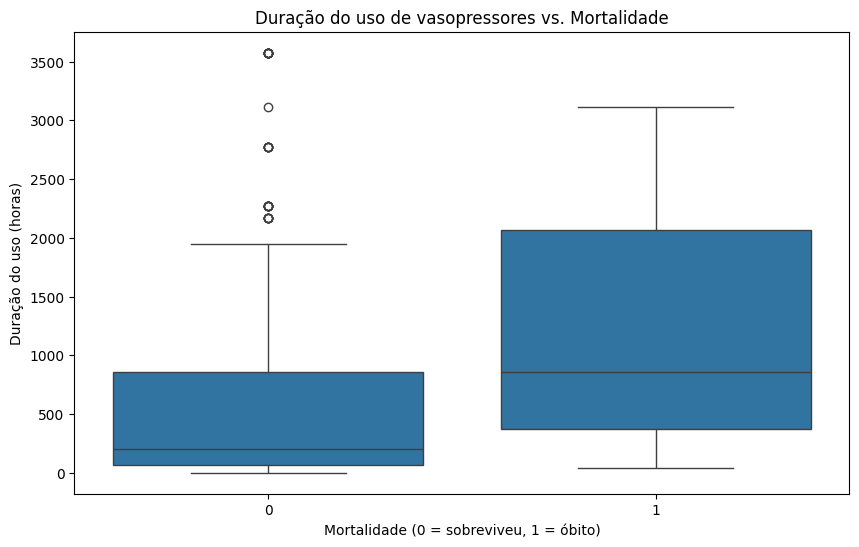

In [31]:
# DURAÇÃO DO USO DOS VASOPRESSORES

# Pegar apenas eventos de vasopressores na tabela inputevents
if 'inputevents' in dados:
    inputevents = dados['inputevents'][['subject_id', 'starttime', 'endtime', 'itemid']]

    # Converter para datetime
    inputevents['starttime'] = pd.to_datetime(inputevents['starttime'])
    inputevents['endtime'] = pd.to_datetime(inputevents['endtime'])

    # Calcular duração do uso (em horas)
    inputevents['duracao_horas'] = (inputevents['endtime'] - inputevents['starttime']).dt.total_seconds() / 3600

    # Juntar com os dados anteriores
    duracoes = inputevents.groupby('subject_id')['duracao_horas'].sum().reset_index()
    df = df.merge(duracoes, on='subject_id', how='left')
    df['duracao_horas'].fillna(0, inplace=True)  # Pacientes que não usaram vasopressores ficam com 0

    # Gráfico de duração vs. mortalidade
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='hospital_expire_flag', y='duracao_horas')
    plt.title("Duração do uso de vasopressores vs. Mortalidade")
    plt.xlabel("Mortalidade (0 = sobreviveu, 1 = óbito)")
    plt.ylabel("Duração do uso (horas)")
    plt.show()
else:
    print("Tabela 'inputevents' não encontrada na versão demo.")


In [32]:
# IMPACTO DE VASOPRESSORES ESPECÍFICOS


# Contar a mortalidade para cada vasopressor
df_vaso = dados['prescriptions'][['subject_id', 'drug']]
df_vaso = df_vaso[df_vaso['drug'].isin(vasopressores)]
df_vaso = df_vaso.merge(mortalidade, on='subject_id', how='left')

# Calcular taxa de mortalidade por vasopressor
df_vaso_grouped = df_vaso.groupby('drug')['hospital_expire_flag'].mean().reset_index()
df_vaso_grouped.columns = ['Vasopressor', 'Taxa de Mortalidade']

# Mostrar resultados
df_vaso_grouped.sort_values(by='Taxa de Mortalidade', ascending=False)


,Vasopressor,Taxa de Mortalidade


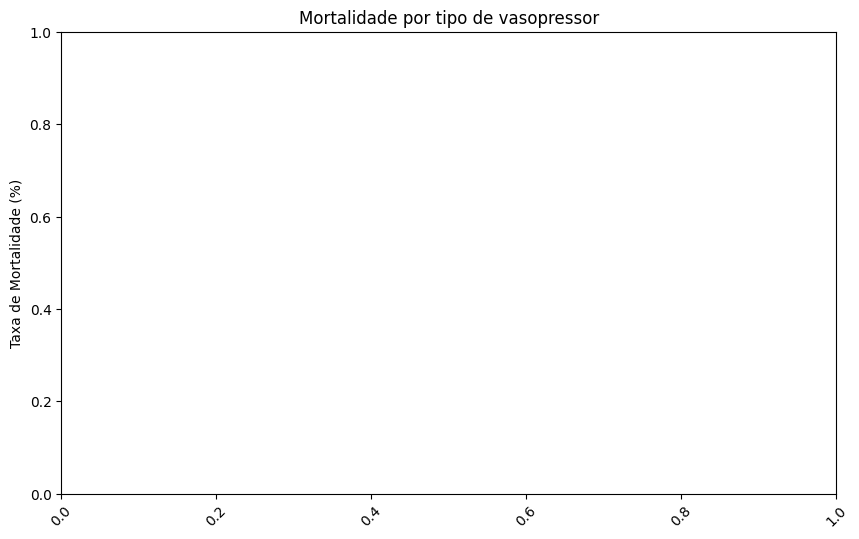

In [33]:
# DIFERENÇA ENTRE OS VASOPRESSORES

plt.figure(figsize=(10,6))
sns.barplot(data=df_vaso_grouped, x='Vasopressor', y='Taxa de Mortalidade')
plt.title("Mortalidade por tipo de vasopressor")
plt.xticks(rotation=45)
plt.ylabel("Taxa de Mortalidade (%)")
plt.show()

#MODELAGEM#
Criar um modelo preditivo de mortalidade